# 2. Pregunta de Investigación 1: ¿El equipo local gana con más frecuencia de lo que lo hace el visitante?

En este notebook analizaremos estadísticamente si jugar en casa otorga una ventaja significativa en la Premier League.
Siguiendo el diseño del estudio, nos centraremos exclusivamente en los partidos que tuvieron un ganador definido.

**Enfoque:**
1.  Excluiremos los empates del análisis.
2.  Compararemos la proporción de victorias locales ($H$) frente al total de victorias ($H + A$).
3.  Utilizaremos una **Prueba de Hipótesis Z para una proporción (unilateral derecha)**.

### Carga de Datos y Librerías

In [5]:
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Cargar el dataset limpio
df = pd.read_csv('../data/cleaned_dataset.csv')

# Mostrar las primeras filas
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSH,PSD,PSA,PSCH,PSCD,PSCA
0,E0,19/08/00,Charlton,Man City,4,0,H,2,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,19/08/00,Chelsea,West Ham,4,2,H,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,19/08/00,Coventry,Middlesbrough,1,3,A,1,1,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,19/08/00,Derby,Southampton,2,2,D,1,2,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,19/08/00,Leeds,Everton,2,0,H,2,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4.1. Preparación de Datos

Filtramos el dataset para quedarnos solo con las filas donde `FTR` es 'H' (Local) o 'A' (Visitante). Obviaremos los empates ('D').

In [6]:
# Filtrar empates
df_wins = df[df['FTR'] != 'D'].copy()

# Contar frecuencias
win_counts = df_wins['FTR'].value_counts()
n_home_wins = win_counts['H']
n_total_wins = len(df_wins)

print("Distribución de victorias:")
print(win_counts)
print(f"\nTotal de partidos decisivos (sin empates): {n_total_wins}")
print(f"Victorias Locales: {n_home_wins}")
print(f"Proporción observada de victorias locales: {n_home_wins / n_total_wins:.4f}")

Distribución de victorias:
FTR
H    3176
A    1913
Name: count, dtype: int64

Total de partidos decisivos (sin empates): 5089
Victorias Locales: 3176
Proporción observada de victorias locales: 0.6241


## 4.2. Prueba de Hipótesis Z (Unilateral Derecha)

Queremos demostrar si la proporción de victorias locales ($p$) es significativamente mayor que la de victorias visitantes.
En un escenario neutral (sin ventaja), si ignoramos los empates, la probabilidad de ganar en casa debería ser del 50% ($p_0 = 0.5$).

**Formulación de Hipótesis:**

*   **Hipótesis Nula ($H_0$):** $p \leq 0.5$ (No hay ventaja de local).
*   **Hipótesis Alternativa ($H_1$):** $p > 0.5$ (Existe ventaja de local).

**Nivel de significancia ($\alpha$):** 0.05

In [7]:
# Parámetros para la prueba
count = n_home_wins      # Número de éxitos (victorias locales)
nobs = n_total_wins      # Número de ensayos (total de partidos ganados)
value = 0.5              # Valor bajo la hipótesis nula (50%)

# Ejecutar la prueba Z
# alternative='larger' especifica que es una prueba unilateral derecha (H1: p > 0.5)
stat, p_value = proportions_ztest(count, nobs, value=value, alternative='larger')

print(f"Estadístico Z: {stat:.4f}")
print(f"Valor P: {p_value:.4e}")  # .4e usa notación científica, útil para valores muy pequeños

Estadístico Z: 18.2765
Valor P: 6.3728e-75


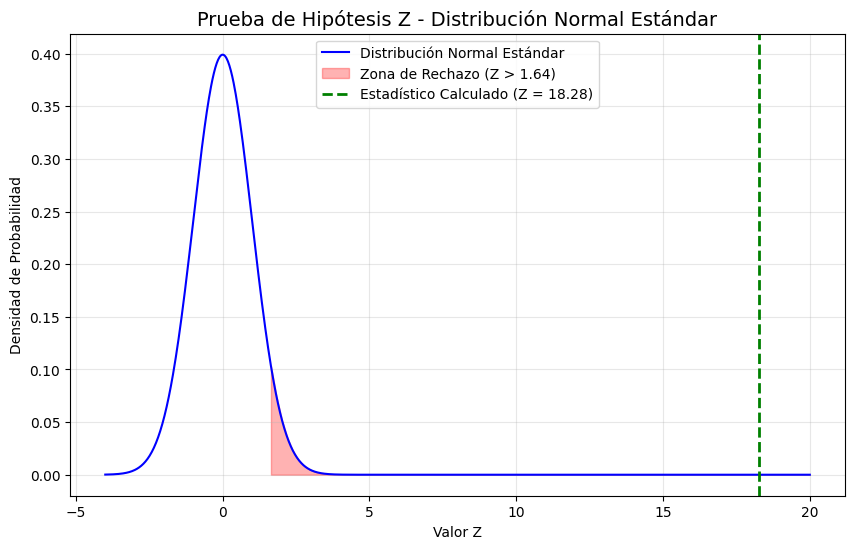

In [8]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Generar datos para la distribución normal estándar
x = np.linspace(-4, 20, 1000) # Extendemos hasta 20 para intentar mostrar nuestro Z
y = stats.norm.pdf(x, 0, 1)

# Dibujar la campana de Gauss
plt.plot(x, y, label='Distribución Normal Estándar', color='blue')

# Definir la zona de rechazo (alfa = 0.05, unilateral derecha)
# El valor crítico Z para alfa = 0.05 es aprox 1.645
critical_value = stats.norm.ppf(0.95)
x_fill = np.linspace(critical_value, 20, 100)
y_fill = stats.norm.pdf(x_fill, 0, 1)

# Sombrear la zona de rechazo
plt.fill_between(x_fill, y_fill, color='red', alpha=0.3, label=f'Zona de Rechazo (Z > {critical_value:.2f})')

# Marcar nuestro estadístico Z calculado
plt.axvline(stat, color='green', linestyle='--', linewidth=2, label=f'Estadístico Calculado (Z = {stat:.2f})')
# Nota: Si Z es muy grande (ej. 18), aparecerá muy a la derecha, confirmando el rechazo contundente.

# Etiquetas y título
plt.title('Prueba de Hipótesis Z - Distribución Normal Estándar', fontsize=14)
plt.xlabel('Valor Z')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

## 4.3. Conclusión de la Pregunta 1

**Interpretación:**
Obtuvimos un **p-value** mucho menor que 0.05 y nuestro estadigrafo cae en la zona de rechazo por lo que rechazamos la hipótesis nula y aceptamos que existe evidencia estadística para afirmar que jugar de local es una ventaja.
